# NYC Airbnb Analysis

In [151]:
import csv
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Import and Clean Data

In [154]:
# Read in data
df = pd.read_csv('airbnbdata.csv')
df.columns.values.tolist()

# Drop irrelevant features
df.drop(['latitude','longitude','review_scores_location',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood', 'neighbourhood_cleansed',
 'property_type',
 'bathrooms_text',
 'beds', 'bathrooms',
 'amenities',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'calendar_last_scraped',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_value',
 'license',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month'],axis=1,inplace=True)

# Set property ID as index
df.set_index('id', inplace=True)

# Replace null values
df['bedrooms']=df['bedrooms'].fillna(1)

df = pd.get_dummies(df)

df.info()

df.head(n=10)

/var/folders/3q/7fynlhf553j564109frc1vgm0000gn/T/ipykernel_4524/139005927.py:2: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnbdata.csv')


<class 'pandas.core.frame.DataFrame'>
Float64Index: 37410 entries, 2595.0 to 6.41241e+17
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   accommodates                                37410 non-null  int64  
 1   bedrooms                                    37410 non-null  float64
 2   price                                       37410 non-null  int64  
 3   minimum_nights                              37410 non-null  int64  
 4   availability_30                             37410 non-null  int64  
 5   availability_60                             37410 non-null  int64  
 6   availability_90                             37410 non-null  int64  
 7   availability_365                            37410 non-null  int64  
 8   neighbourhood_group_cleansed_Bronx          37410 non-null  uint8  
 9   neighbourhood_group_cleansed_Brooklyn       37410 non-null  uint8  
 1

,accommodates,bedrooms,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
id,,,,,,,,,,,,,,,,,
2595.0,1,1.0,225,30,0,3,33,308,0,0,1,0,0,1,0,0,0
5121.0,2,1.0,60,30,30,60,90,365,0,1,0,0,0,0,0,1,0
5136.0,4,2.0,275,21,3,3,4,250,0,1,0,0,0,1,0,0,0
5178.0,2,1.0,68,2,3,5,9,172,0,0,1,0,0,0,0,1,0
5203.0,1,1.0,75,2,0,0,0,0,0,0,1,0,0,0,0,1,0
5295.0,2,1.0,135,30,0,0,19,30,0,0,1,0,0,1,0,0,0
5803.0,2,1.0,118,4,3,12,37,312,0,1,0,0,0,0,0,1,0
6848.0,3,1.0,84,30,0,0,17,227,0,1,0,0,0,1,0,0,0
6872.0,1,1.0,65,30,0,29,59,334,0,0,1,0,0,0,0,1,0


<AxesSubplot: >

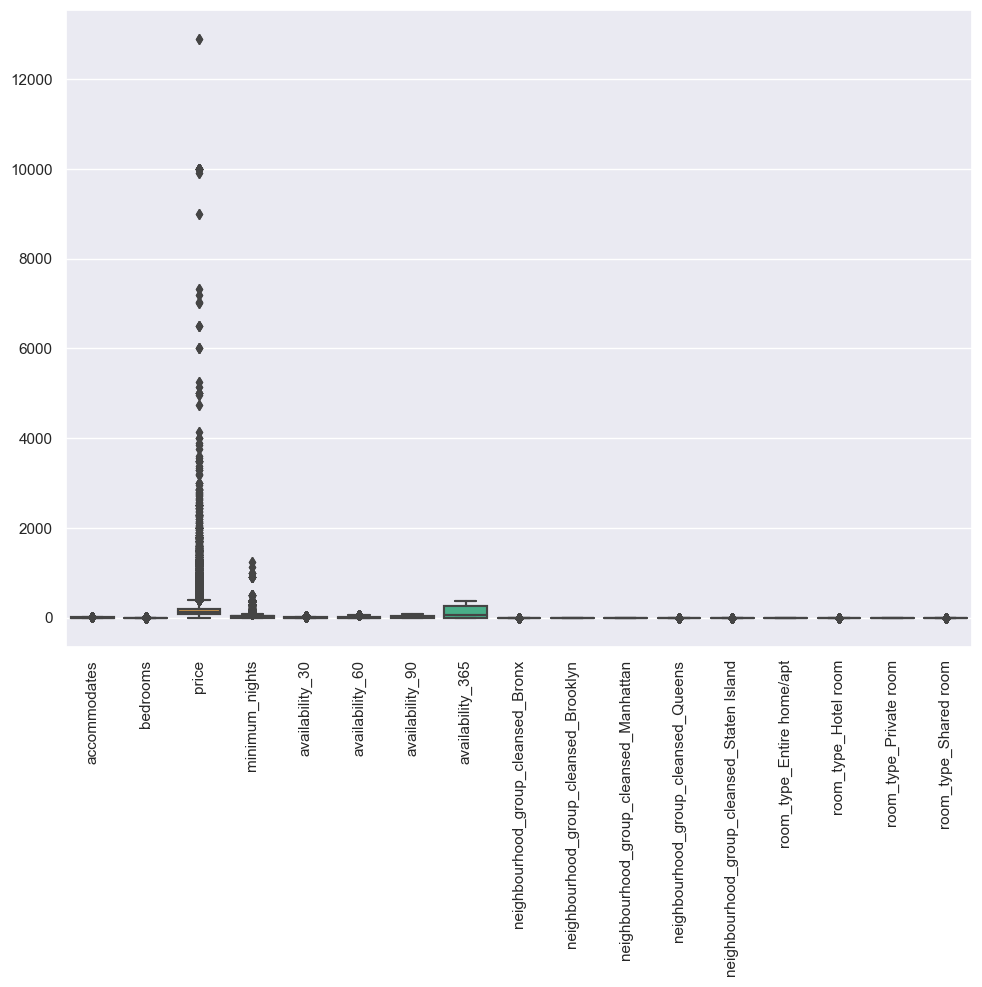

In [155]:
box = sns.boxplot(df)
box.set_xticklabels(box.get_xticklabels(), rotation=90)
sns.boxplot(df)

### Remove Outliers

In [156]:
percentile25 = df['price'].quantile(0.25)
percentile75 = df['price'].quantile(0.75)
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

iqr = percentile75 - percentile25
print ("IQR: ",iqr)

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("upper limit: ", upper_limit)
print("lower limit: ", lower_limit)
df[df['price'] > upper_limit].count()

df = df[df['price'] < upper_limit]
df.shape

75th quartile:  203.0
25th quartile:  75.0
IQR:  128.0
upper limit:  395.0
lower limit:  -117.0


(34330, 17)

### Data Exploration

array([[<AxesSubplot: title={'center': 'accommodates'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'minimum_nights'}>],
       [<AxesSubplot: title={'center': 'availability_30'}>,
        <AxesSubplot: title={'center': 'availability_60'}>,
        <AxesSubplot: title={'center': 'availability_90'}>,
        <AxesSubplot: title={'center': 'availability_365'}>],
       [<AxesSubplot: title={'center': 'neighbourhood_group_cleansed_Bronx'}>,
        <AxesSubplot: title={'center': 'neighbourhood_group_cleansed_Brooklyn'}>,
        <AxesSubplot: title={'center': 'neighbourhood_group_cleansed_Manhattan'}>,
        <AxesSubplot: title={'center': 'neighbourhood_group_cleansed_Queens'}>],
       [<AxesSubplot: title={'center': 'neighbourhood_group_cleansed_Staten Island'}>,
        <AxesSubplot: title={'center': 'room_type_Entire home/apt'}>,
        <AxesSubplot: title={'center': 'room_type_Hotel 

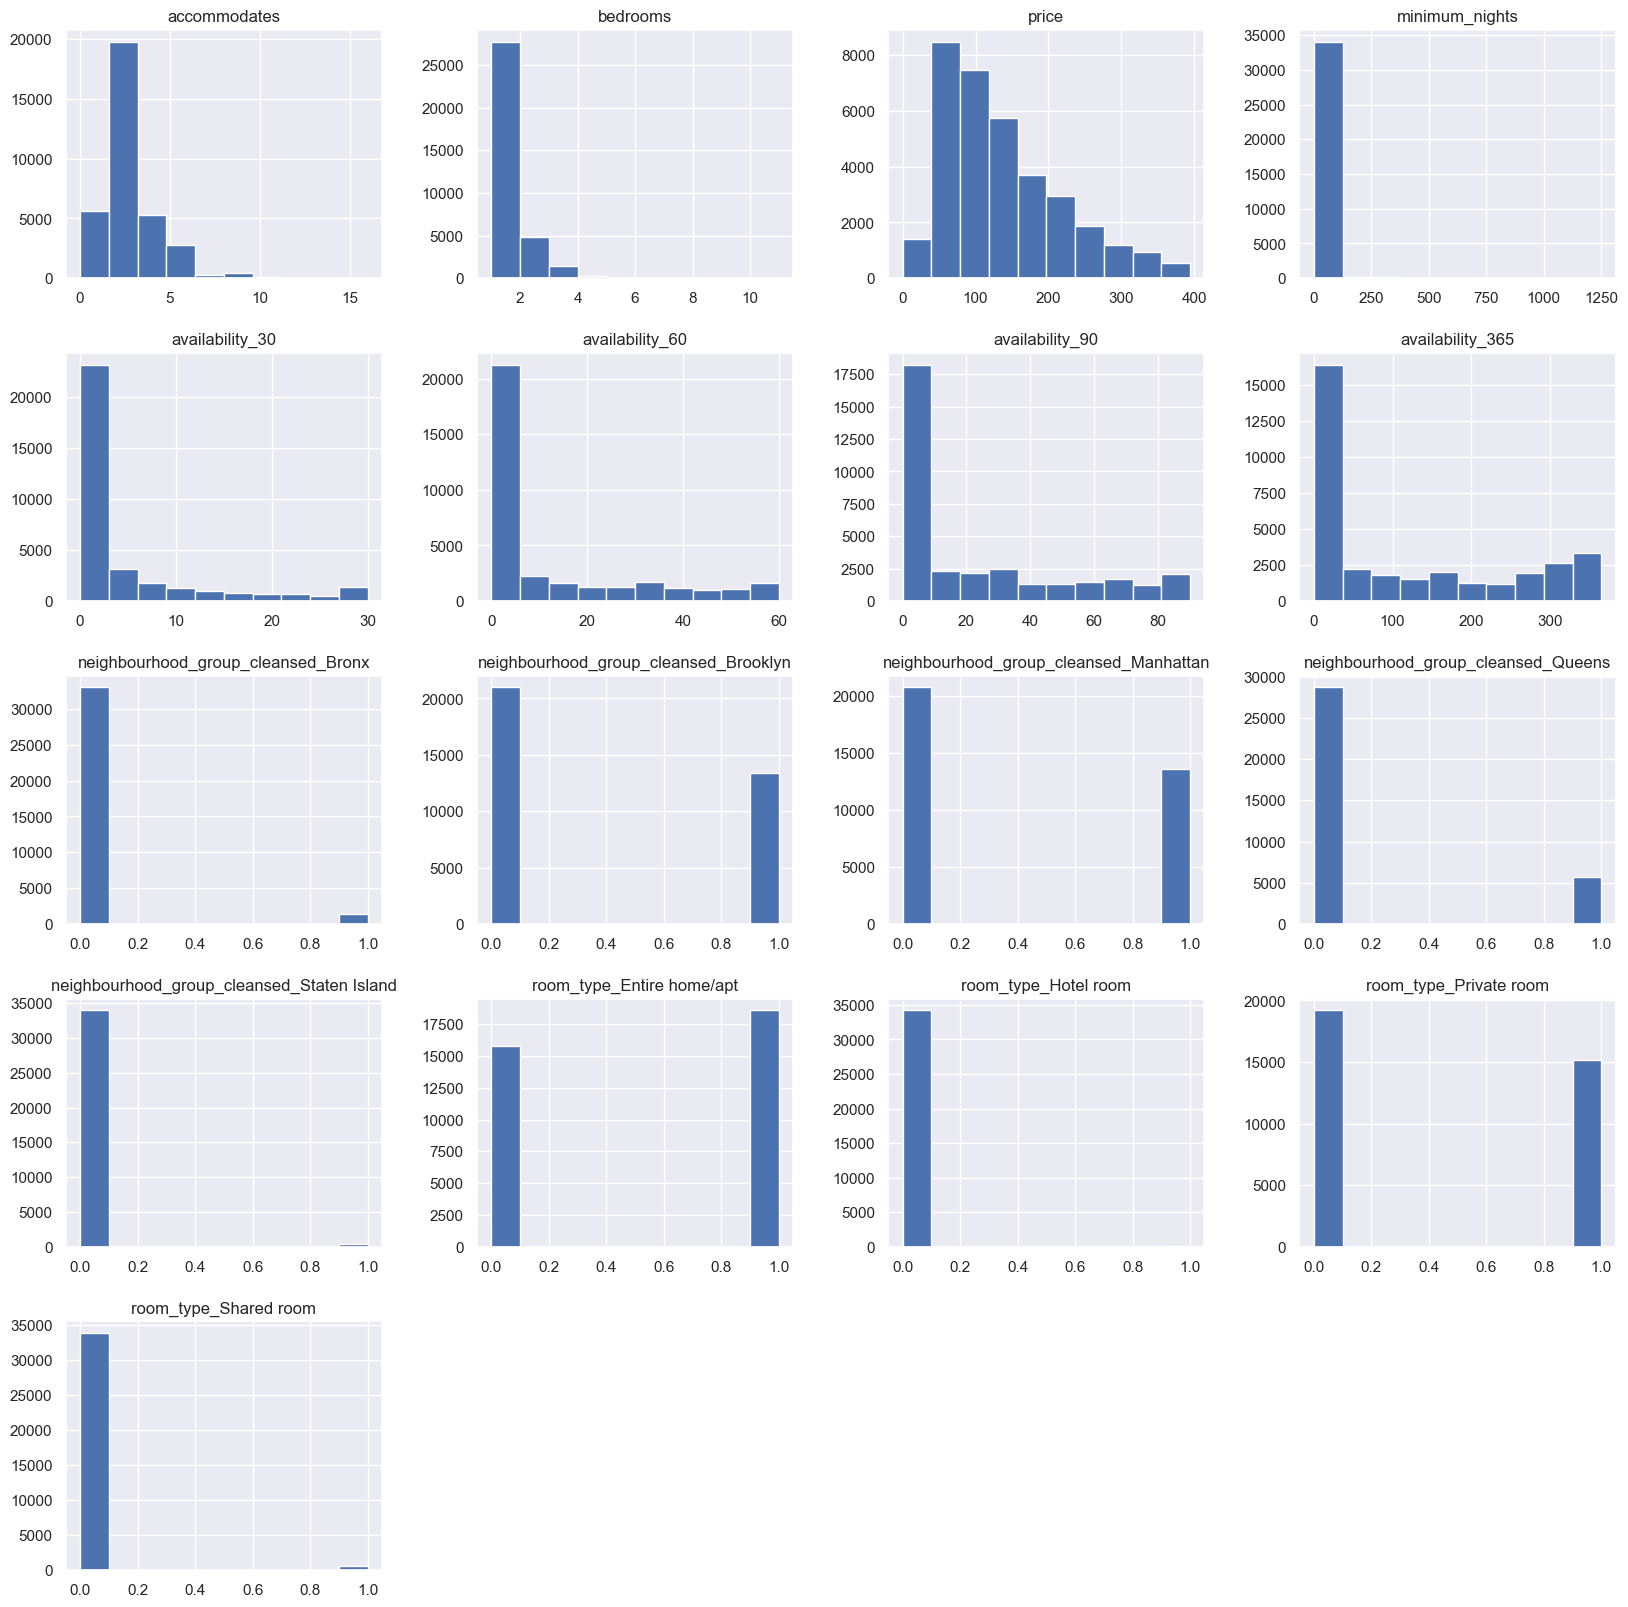

In [157]:
# Distribution of each feature
df.hist(figsize=(20,20))

## Data Analysis

### Split

In [91]:
# Identify independent and dependent variables
X = df.drop(['price'], axis=1)
y = df['price']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(len(X_train), len(X_test), len(y_train), len(y_test))

27464 6866 27464 6866


In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 34330 entries, 2595.0 to 6.41241e+17
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   accommodates                                34330 non-null  int64  
 1   bedrooms                                    34330 non-null  float64
 2   minimum_nights                              34330 non-null  int64  
 3   availability_30                             34330 non-null  int64  
 4   availability_60                             34330 non-null  int64  
 5   availability_90                             34330 non-null  int64  
 6   availability_365                            34330 non-null  int64  
 7   neighbourhood_group_cleansed_Bronx          34330 non-null  uint8  
 8   neighbourhood_group_cleansed_Brooklyn       34330 non-null  uint8  
 9   neighbourhood_group_cleansed_Manhattan      34330 non-null  uint8  
 1

### Multiple Regression

In [93]:
# Fit regression model
mlr = LinearRegression()
mlr.fit(X,y)

# Predict
y_pred = mlr.predict(X)
print('Results for multiple regression on training data')
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y,y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = mlr.predict(X_test)
print()
print('Results for multiple regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for multiple regression on training data
MAE is  43.91324308975538
RMSE is  59.48424732497954
MSE is  3538.375679819336
R^2  0.4716866712478177

Results for multiple regression on test data
MAE is  44.034182158478856
RMSE is  59.99890348940005
MSE is  3599.868419930341
R^2  0.4689706809807598


### Decision Tree Regression

In [94]:
# Fit regression model
dt = DecisionTreeRegressor()
dt.fit(X, y)

# Predict
y_pred = dt.predict(X)
print('Results for decision tree on training data')
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y,y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = dt.predict(X_test)
print()
print('Results for decision tree on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for decision tree on training data
MAE is  16.555209837366146
RMSE is  33.742053411121205
MSE is  1138.5261683989563
R^2  0.8300071546023536

Results for decision tree on test data
MAE is  15.98992129391095
RMSE is  32.590779593709
MSE is  1062.1589145257192
R^2  0.8433171829425581


In [152]:
# Visualize weight of each feature

ft_weights_dt = pd.DataFrame(dt.feature_importances_, columns=['weight'], index=X.columns)
ft_weights_dt.sort_values('weight', inplace=True)
ft_weights_dt

,weight
room_type_Shared room,0.000826
neighbourhood_group_cleansed_Staten Island,0.001215
neighbourhood_group_cleansed_Bronx,0.001604
room_type_Private room,0.001851
neighbourhood_group_cleansed_Queens,0.003475
room_type_Hotel room,0.004365
neighbourhood_group_cleansed_Brooklyn,0.009617
bedrooms,0.028587
availability_60,0.049437
neighbourhood_group_cleansed_Manhattan,0.065512


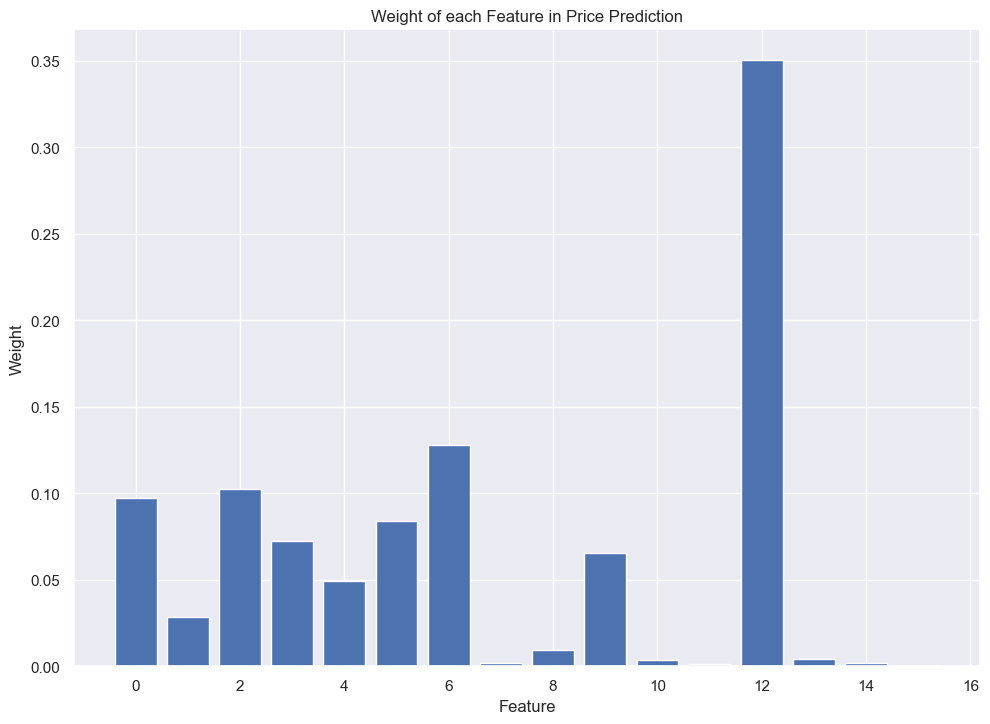

In [141]:
plt.bar([x for x in range(len(dt.feature_importances_))], dt.feature_importances_)
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Weight of each Feature in Price Prediction')
plt.show()

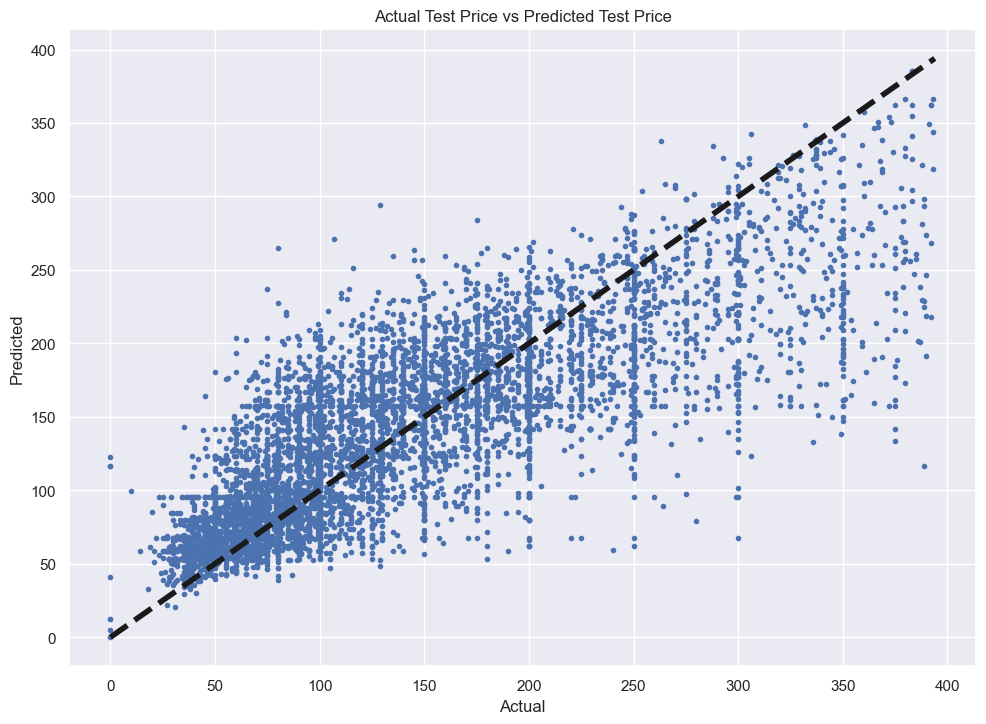

In [153]:
# Visualize actual vs predicted price

scatter = plt.scatter(y_test, y_test_pred, marker=".")
plt.title("Actual Test Price vs Predicted Test Price")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()

### Random Forest Regression

In [98]:
rf = RandomForestRegressor()
rf.fit(X,y)
y_pred = rf.predict(X)

y_pred = rf.predict(X)
print('Results for random forest on training data')
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y,y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = rf.predict(X_test)
print()
print('Results for random forest on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))


Results for random forest on training data
MAE is  25.009762705302958
RMSE is  37.46713931842463
MSE is  1403.786528706241
R^2  0.7904012459535863

Results for random forest on test data
MAE is  24.536467073731743
RMSE is  36.483257682832814
MSE is  1331.0280911519797
R^2  0.8036553400322359


### XGBoost

In [99]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X,y)

y_pred = xgb_reg.predict(X)
print('Results for xgboost on training data')
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y,y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = xgb_reg.predict(X_test)
print()
print('Results for decision tree on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for xgboost on training data
MAE is  35.69633607393776
RMSE is  49.20927293491238
MSE is  2421.5525427826997
R^2  0.6384390465030665

Results for decision tree on test data
MAE is  35.263264951820005
RMSE is  48.62719125854535
MSE is  2364.6037296951495
R^2  0.6511889430795728


# Results
| Model | Training Features | Set | RMSE | R2 (%) |
|:---|:---|:---|:---|:---|
|Multiple Regression|Independent|Training|59.48|47.17|
|Multiple Regression|Independent|Test|60.00|46.90|
|Decision Tree|Independent|Training|33.74|83.00|
|Decision Tree|Independent|Test|32.59|84.33|
|Random Forest|Independent|Training|37.47|79.04|
|Random Forest|Independent|Test|36.48|80.37|
|XGBoost|Independent|Training|49.21|63.84|
|XGBoost|Independent|Test|48.63|65.12|